# Working with Timeseries and Dates in Pandas<a name="_working with timeseries and dates in pandas"></a>

# Table of Contents
- [ Working with Timeseries and Dates in Pandas](#_working with timeseries and dates in pandas) 
  - [ A DateTime Index column](#_a datetime index column) 
  - [ A non-index DateTime column](#_a non-index datetime column) 
  - [ Practice with Columns](#_practice with columns) 
  - [ Practice with Groupby, using datetimes](#_practice with groupby, using datetimes) 
  - [ Partial String Indexing for Dates](#_partial string indexing for dates) 
  - [ Using Rolling Windows](#_using rolling windows) 
  - [ Date Conversions and Formatting](#_date conversions and formatting) 
  - [ Drop NaNs](#_drop nans) 


Excellent resources: 

* pandas docs on timeseries /date functionality: http://pandas.pydata.org/pandas-docs/stable/timeseries.html 
    
* financial data in detail: http://nbviewer.jupyter.org/github/changhiskhan/talks/blob/master/pydata2012/pandas_timeseries.ipynb
        

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## A DateTime Index column<a name="_a datetime index column"></a>

In [2]:
goog = pd.read_csv("data/goog.csv", index_col="Date", parse_dates=True)

**Take note: Because I set the date to the index, when I work with it, I need to use goog.index. If it wasn't an index column, you would just need to make sure it's a date and use `.dt` instead of `.index`. See below.**

Some functions that work on dates include .day -- get the day of the month:

In [10]:
goog.index.day

array([ 4,  5,  6, ..., 29, 30, 31], dtype=int32)

Get the weekday -- what day of the week is it?

In [11]:
goog.index.weekday

array([0, 1, 2, ..., 0, 1, 2], dtype=int32)

The days of the week start with 0 for Monday.

Let's add the day of the week to the dataframe:

In [5]:
goog['Weekday'] = goog.index.weekday

In [6]:
goog

,Open,High,Low,Close,Volume,Weekday
Date,,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN,0
2010-01-05,313.28,313.61,310.46,311.68,NaN,1
2010-01-06,312.62,312.62,302.88,303.83,NaN,2
2010-01-07,304.40,304.70,296.03,296.75,NaN,3
2010-01-08,295.70,301.32,294.26,300.71,NaN,4
2010-01-11,301.93,301.93,296.72,300.25,NaN,0
2010-01-12,298.74,298.78,293.71,294.94,NaN,1
2010-01-13,287.96,293.90,286.66,293.25,NaN,2
2010-01-14,291.66,296.80,291.11,294.63,NaN,3


What do you notice -- It's only weekdays in here, because those are trading days!  No need to do any cleaning, then.

## A non-index DateTime column<a name="_a non-index datetime column"></a>

Let's also duplicate the index column as a regular column, so you see how that works too:

In [7]:
goog['date copy'] = goog.index

In [8]:
goog.head()

,Open,High,Low,Close,Volume,Weekday,date copy
Date,,,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN,0,2010-01-04
2010-01-05,313.28,313.61,310.46,311.68,NaN,1,2010-01-05
2010-01-06,312.62,312.62,302.88,303.83,NaN,2,2010-01-06
2010-01-07,304.40,304.70,296.03,296.75,NaN,3,2010-01-07
2010-01-08,295.70,301.32,294.26,300.71,NaN,4,2010-01-08


In [9]:
goog.dtypes

Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
Weekday               int32
date copy    datetime64[ns]
dtype: object

In [18]:
# Like str -- you need .dt if you're not dealing with an index datetime obj
goog['date copy'].dt.weekday_name.head()

Date
2010-01-04       Monday
2010-01-05      Tuesday
2010-01-06    Wednesday
2010-01-07     Thursday
2010-01-08       Friday
Name: date copy, dtype: object

For all the time-date components you can access, here is the doc: http://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components

## Practice with Columns<a name="_practice with columns"></a>

Let's add a column for the Difference between Open and Close:

In [19]:
goog['Change'] = goog['Close'] - goog['Open']

In [20]:
goog.head()

,Open,High,Low,Close,Volume,Weekday,date copy,Change
Date,,,,,,,,
2010-01-04,313.16,314.44,311.81,313.06,NaN,0,2010-01-04,-0.10
2010-01-05,313.28,313.61,310.46,311.68,NaN,1,2010-01-05,-1.60
2010-01-06,312.62,312.62,302.88,303.83,NaN,2,2010-01-06,-8.79
2010-01-07,304.40,304.70,296.03,296.75,NaN,3,2010-01-07,-7.65
2010-01-08,295.70,301.32,294.26,300.71,NaN,4,2010-01-08,5.01


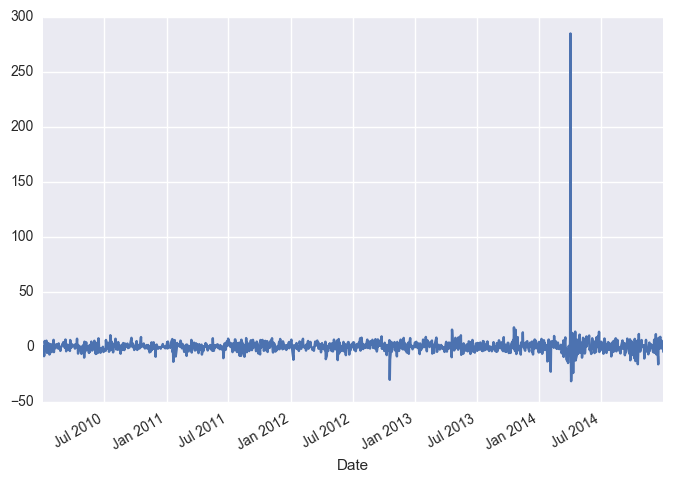

In [21]:
ax = goog['Change'].plot()

In [22]:
goog['Change'].max()

284.55000000000001

If you want the row/index with the max value, there's a special command I had to look up too:

In [23]:
goog['Change'].idxmax()

Timestamp('2014-04-02 00:00:00')

In [25]:
goog.loc[goog['Change'].idxmax()]

Open                      282.43
High                      571.83
Low                       561.44
Close                     566.98
Volume                2.0888e+06
Weekday                        2
date copy    2014-04-02 00:00:00
Change                    284.55
Name: 2014-04-02 00:00:00, dtype: object

In [24]:
goog.loc['2014-04-02']

Open                      282.43
High                      571.83
Low                       561.44
Close                     566.98
Volume                2.0888e+06
Weekday                        2
date copy    2014-04-02 00:00:00
Change                    284.55
Name: 2014-04-02 00:00:00, dtype: object

## Practice with Groupby, using datetimes<a name="_practice with groupby, using datetimes"></a>

In [28]:
goog.index.month

array([ 1,  1,  1, ..., 12, 12, 12], dtype=int32)

In [34]:
len(goog)

1257

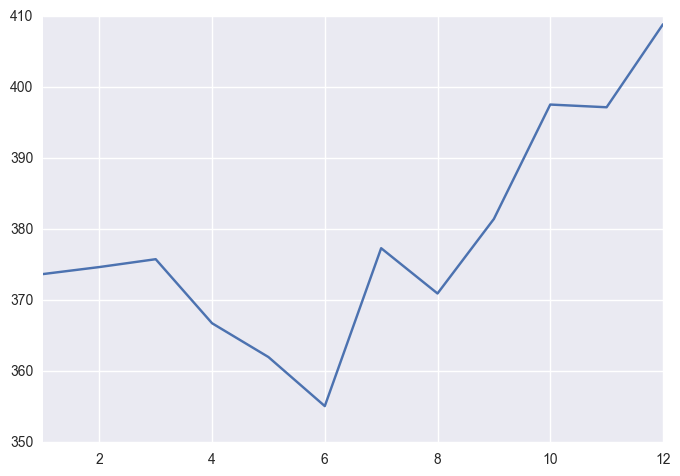

In [35]:
#We can group by months, or weekdays, and plot:
    
goog.groupby(goog.index.month).aggregate(np.mean)['High'].plot()

## Partial String Indexing for Dates<a name="_partial string indexing for dates"></a>

We saw this before - you can use strings to partially match against the index.  See more docs here: 1st semester - 30 credits ECTS
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#datetimeindex-partial-string-indexing

In [39]:
goog.loc['2012-01']  # or shorthand goog['2012-01']

,Open,High,Low,Close,Volume,Weekday,date copy,Change
Date,,,,,,,,
2012-01-03,326.14,333.74,325.86,332.37,NaN,1,2012-01-03,6.23
2012-01-04,332.18,334.79,329.98,333.81,NaN,2,2012-01-04,1.63
2012-01-05,330.73,331.65,327.79,329.18,NaN,3,2012-01-05,-1.55
2012-01-06,329.25,329.67,324.57,324.68,NaN,4,2012-01-06,-4.57
2012-01-09,322.93,323.18,310.30,310.92,NaN,0,2012-01-09,-12.01
2012-01-10,314.56,316.58,308.15,311.26,NaN,1,2012-01-10,-3.30
2012-01-11,311.44,314.38,310.25,312.67,NaN,2,2012-01-11,1.23
2012-01-12,315.29,316.13,312.94,314.51,NaN,3,2012-01-12,-0.78
2012-01-13,312.82,313.16,310.22,312.18,NaN,4,2012-01-13,-0.64


Let's use this to slice and plot a part of the data around the max time, which we know is 2014-04-02:

In [40]:
goog['2014-03-25':'2014-04-10']

,Open,High,Low,Close,Volume,Weekday,date copy,Change
Date,,,,,,,,
2014-03-25,582.42,584.34,572.93,578.78,NaN,1,2014-03-25,-3.64
2014-03-26,580.42,585.20,565.18,565.42,NaN,2,2014-03-26,-15.00
2014-03-27,564.86,565.40,550.50,556.58,3826676.0,3,2014-03-27,-8.28
2014-03-28,558.94,566.03,558.33,559.51,2258918.0,4,2014-03-28,0.57
2014-03-31,564.63,566.93,555.87,556.70,1942277.0,0,2014-03-31,-7.93
2014-04-01,559.57,568.18,558.44,566.88,2182626.0,1,2014-04-01,7.31
2014-04-02,282.43,571.83,561.44,566.98,2088804.0,2,2014-04-02,284.55
2014-04-03,569.85,587.28,564.13,569.74,5087530.0,3,2014-04-03,-0.11
2014-04-04,574.65,577.77,543.00,543.14,6377658.0,4,2014-04-04,-31.51


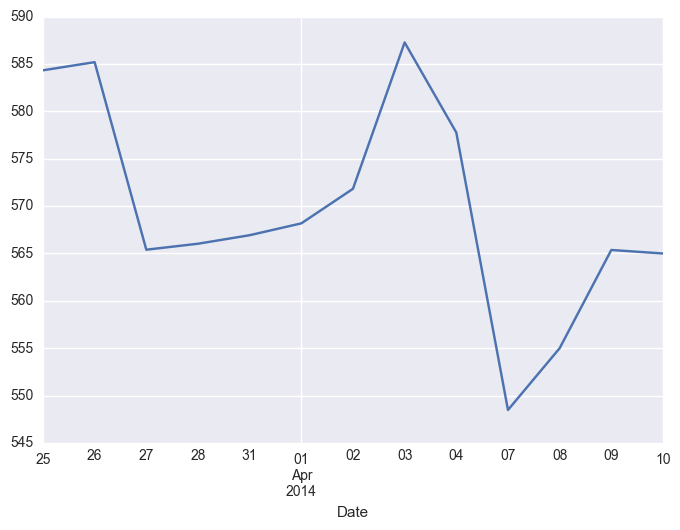

In [41]:
goog['2014-03-25':'2014-04-10']['High'].plot()

## Using Rolling Windows<a name="_using rolling windows"></a>

Suppose you want to smooth out a noisy timeseries plot. You can set a window size over which to smooth, and a function like mean, to calculate over that window.  This is also quite similar to resample.  Usually you can use that.

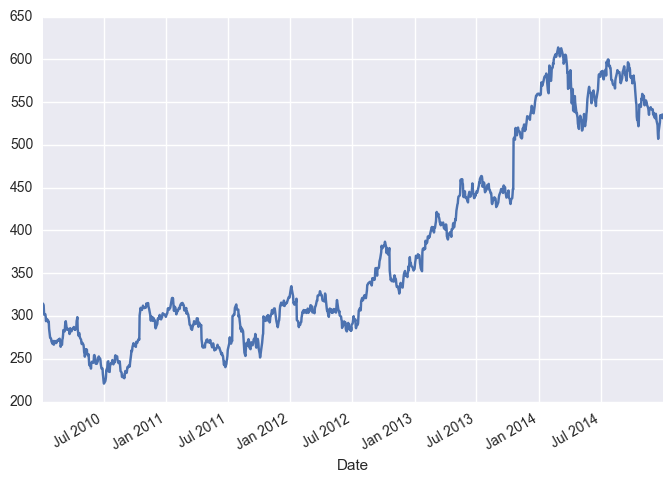

In [42]:
# You can see a lot of jagged edges in here - that's daily small variation noise.  But the rough curve is clear.
goog['High'].plot()

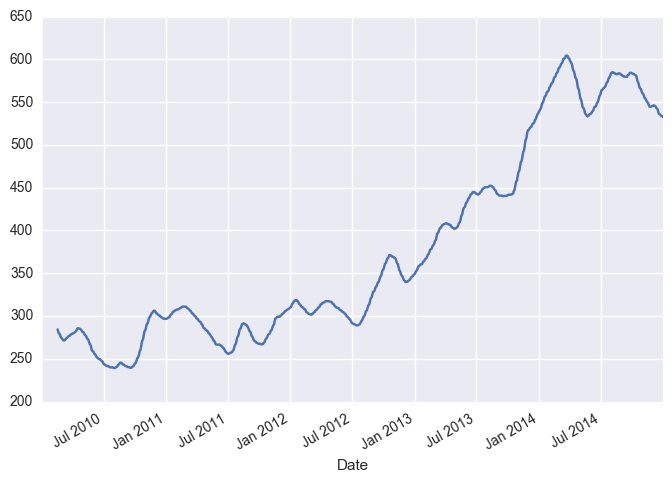

In [48]:
# this is a 30 day window.
goog['High'].rolling(window=30).mean().plot()

## Date Conversions and Formatting<a name="_date conversions and formatting"></a>

I downloaded this data from here: http://www.nasdaq.com/symbol/aapl/interactive-chart?timeframe=5d

In [49]:
apple = pd.read_csv("data/apple_jan2017.csv")

In [50]:
apple.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-23 09-30,119.93,119.93,119.93,119.93,148142.0
1,2017-01-23 09-31,120.23,120.23,120.23,120.23,1039374.0
2,2017-01-23 09-32,120.18,120.18,120.18,120.18,250078.0
3,2017-01-23 09-33,120.27,120.27,120.27,120.27,206714.0
4,2017-01-23 09-34,120.38,120.38,120.38,120.38,246886.0


In [51]:
# there's an error at the end... we don't want this row!
apple.tail()

,Date,Open,High,Low,Close,Volume
2090,2017-01-27 19-49,121.49,121.49,121.49,121.49,28.0
2091,2017-01-27 19-53,121.48,121.48,121.48,121.48,876.0
2092,2017-01-27 19-56,121.42,121.42,121.42,121.42,976.0
2093,2017-01-27 19-59,121.55,121.55,121.55,121.55,200.0
2094,This document was made with Webix library. htt...,NaN,NaN,NaN,NaN,NaN


In [52]:
apple = apple.drop(2094)

In [53]:
apple.tail()

,Date,Open,High,Low,Close,Volume
2089,2017-01-27 19-46,121.40,121.40,121.40,121.40,708.0
2090,2017-01-27 19-49,121.49,121.49,121.49,121.49,28.0
2091,2017-01-27 19-53,121.48,121.48,121.48,121.48,876.0
2092,2017-01-27 19-56,121.42,121.42,121.42,121.42,976.0
2093,2017-01-27 19-59,121.55,121.55,121.55,121.55,200.0


In [54]:
# We have to tell the datetime function how to read the string:
apple['Date'] = pd.to_datetime(apple['Date'],format="%Y-%m-%d %H-%M")

In [55]:
apple.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [57]:
apple['Date'].head()

0   2017-01-23 09:30:00
1   2017-01-23 09:31:00
2   2017-01-23 09:32:00
3   2017-01-23 09:33:00
4   2017-01-23 09:34:00
Name: Date, dtype: datetime64[ns]

Some info on datetime formats is here: https://docs.python.org/3/library/datetime.html

In [58]:
apple = apple.set_index('Date')

In [59]:
apple.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-23 09:30:00,119.93,119.93,119.93,119.93,148142.0
2017-01-23 09:31:00,120.23,120.23,120.23,120.23,1039374.0
2017-01-23 09:32:00,120.18,120.18,120.18,120.18,250078.0
2017-01-23 09:33:00,120.27,120.27,120.27,120.27,206714.0
2017-01-23 09:34:00,120.38,120.38,120.38,120.38,246886.0


We can "resample" the data by a time window, and create new time labels if we want.  This acts like a groupby, and uses a mean of the window of 60 minutes.  Why do you think there are NaNs there?

In [63]:
len(apple['High'].resample("60Min", label="right").mean())

107

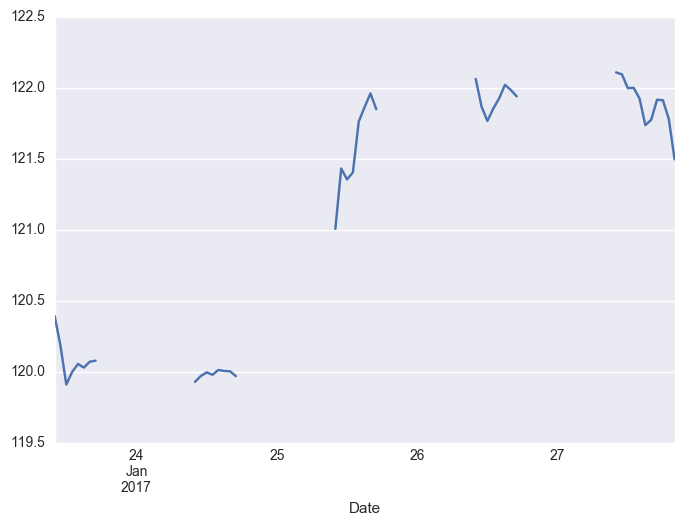

In [68]:
apple['High'].resample("60Min", label="right").mean().plot()

## Drop NaNs<a name="_drop nans"></a>

If you want to remove the NaNs, Pandas has a lot of drop functionality for NaNs.

In [64]:
highs = apple['High'].resample("60Min", label="right").mean()  #.plot()

In [65]:
highs = highs.dropna()

In [66]:
len(highs)

43

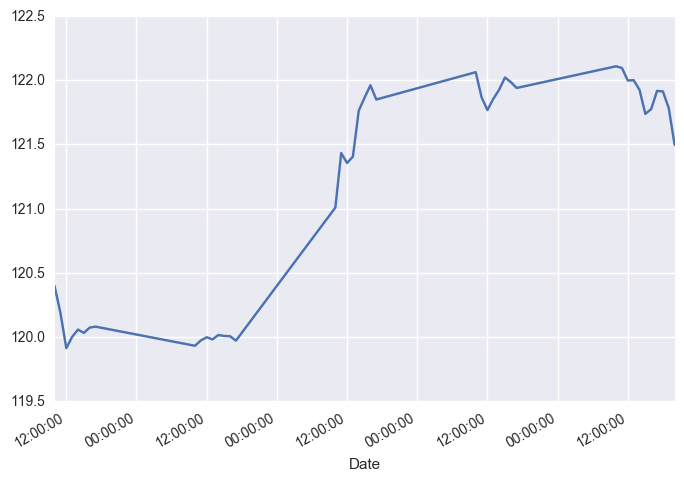

In [69]:
highs.plot()